In [17]:
from m02integrate import fun_m02_txc
import numpy as np
import pandas as pd

df_info = pd.read_csv(r'data\lab_mono_init_info.csv')

In [25]:
mat_params = {
    'e_csref': 0.788,
    'l_cs': 0.091,
    'csi_cs': 0.138,
    'pref': 100,
    'mcs': 1.3178,
    'k1': 2.36,
    'k2': 0,
    'l1': 3.42,
    'l2': 0,
    'g0': 65000,
    'mg': 0.5,
    'a0': 5e-5,
    'b': 1.1,
    'rgmin': 0.15,
    'pr': 0.23,
}

sel_tests = ['CD2', 'CD3', 'CD4', 'CD5', 'CD6']
outputs = {}
for test in sel_tests:
    info = df_info[df_info['test_id'] == test].iloc[0]
    e0, p0, q0 = np.array(info[['e0', 'p0_kPa', 'q0_kPa']], dtype=float)

    init_conds = {'e0': e0,'p0': p0,'q0': q0,}
    
    output = fun_m02_txc(
        mat_params, init_conds,
    )
    outputs[test] = output

In [27]:
outputs['CD2'].keys()

dict_keys(['eax', 'evol', 'erad', 'ed', 'p', 'q', 'vr', 'pvr', 'psi', 'mtxc', 'mdil', 'dpvr', 'gtan', 'ktan'])

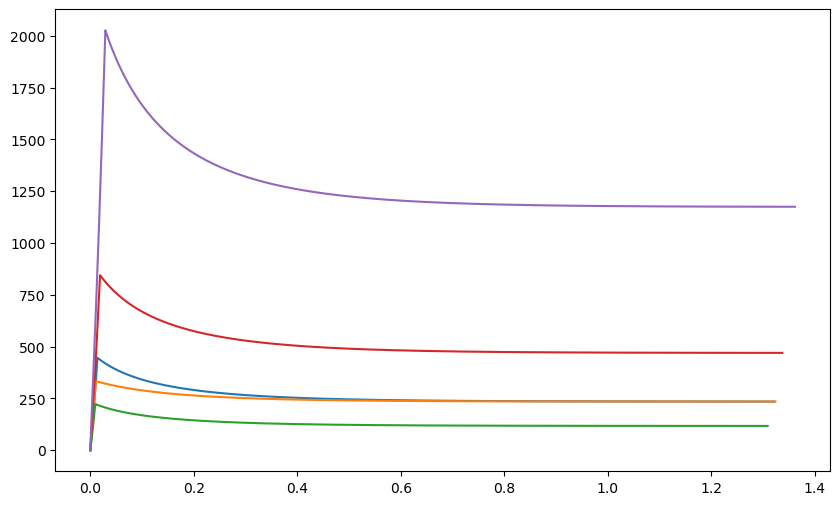

In [29]:
f , ax = plt.subplots(1, 1, figsize=(10, 6))
for test, output in outputs.items():
    ax.plot(output['eax'], output['q'], label=test)

In [ ]:


init_conds = {
    'e0': 0.576,
    # 'e0': 0.693,
    'p0': 100.,
    'q0': 0.
}

output = fun_m02_txc(
    mat_params, init_conds,
)

In [5]:
output.keys()

dict_keys(['eax', 'evol', 'erad', 'ed', 'p', 'q', 'vr', 'pvr', 'psi', 'mtxc', 'mdil', 'dpvr', 'gtan', 'ktan'])

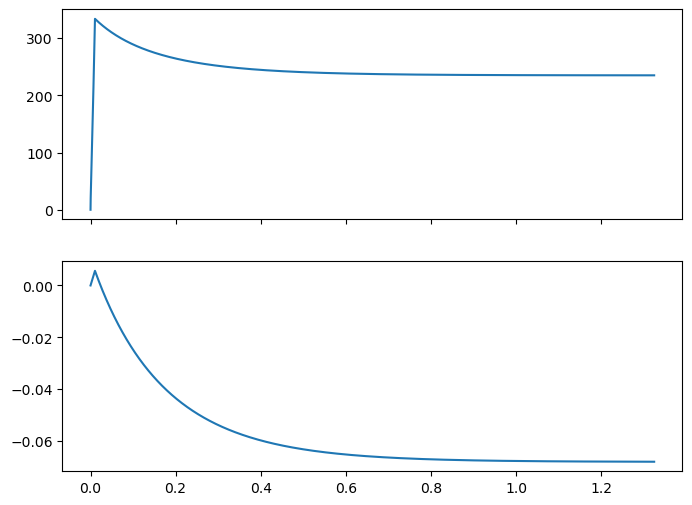

In [7]:
from matplotlib import pyplot as plt

f, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(output['eax'], output['q'])
axs[1].plot(output['eax'], output['evol'])